In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from library.constants import *
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix
plt.style.use('seaborn-white')

In [2]:
# color=["#332288","#117733","#44AA99","#88CCEE","#DDCC77","#CC6677"]
# color=['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000','#6C8E80']
color=sns.color_palette()

+ Figure 12: Impact on the performance of the pre-trained model with newly annotated data -(a) City-1 (b) City-2

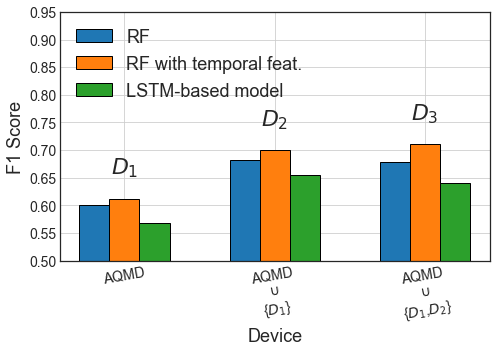

In [3]:
#Durgapur (a)
rf_aug_old=pd.read_csv("./logs/exp/dgp_rf_old_aug.csv")["f1_score_test"] #RF OLD
rf_aug=pd.read_csv("./logs/exp/dgp_rf_aug.csv")["f1_score_test"] #RF
rnn_aug=pd.read_csv("./logs/exp/dgp_rnn_aug.csv")["f1_score_test"] #RNN

xlabel=[]
for n in [1,2,3]:
    D=""
    for d in range(1,n):
        D+="${"+f"D_{d}"+"}$,"
    if n==1:
        xlabel.append("AQMD")
        continue
    xlabel.append("AQMD\n${\cup}$\n{"+D[:-1]+"}")
    
def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i+1, y[i], x[i], fontdict=dict(size=fontsize),ha = 'center')

fig, ax = plt.subplots(figsize=(7,5))
#RF OLD
ax.bar(x=np.array([1,2,3])-0.2,height=rf_aug_old,align='center', alpha=1, ecolor='k',
       capsize=10,color=color[0],ec='k',linewidth=1,
       width=0.2,
       error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3),label="RF")

#RF
ax.bar(x=np.array([1,2,3]),height=rf_aug,align='center', alpha=1, ecolor='k',
       capsize=10,color=color[1],ec='k',linewidth=1,
       width=0.2,#hatch='oo',
       error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3),label="RF with temporal feat.")
#RNN
ax.bar(x=np.array([1,2,3])+0.2,height=rnn_aug,align='center', alpha=1, ecolor='k',
       capsize=10,color=color[2],ec='k',linewidth=1,
       width=0.2,#hatch='//',
       error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3),label="LSTM-based model")

ax.set_ylim(0.5,0.95)
#ax.set_xlim(-0.5,4.5)

ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("F1 Score",fontsize=18)

ax.set_xticks([1,2,3])
ax.set_xticklabels(xlabel,rotation=10,fontsize=14)
plt.yticks(fontsize=14)
addlabels(["${D_"+f"{i}"+"}$\n" for i in range(1,4)],np.max([rf_aug_old.values,rf_aug.values,
                                                                    rnn_aug.values],axis=0))

#LEGEND######
# plt.bar([1],[0],label='RF',color='white',ec='k')
# plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch="oo")
# plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper left',prop=dict(size=18))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_aug.png")

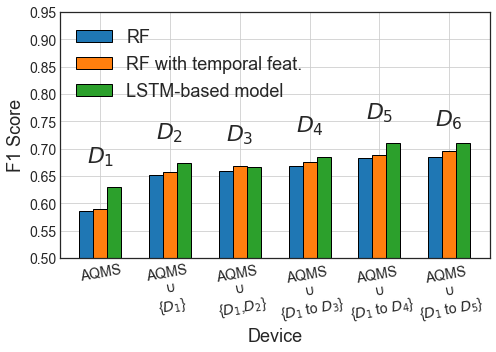

In [4]:
#Delhi (b)
rf_aug_old=pd.read_csv("./logs/exp/delhi_rf_old_aug.csv")["f1_score_test"] #RF OLD
rf_aug=pd.read_csv("./logs/exp/delhi_rf_aug.csv")["f1_score_test"] #RF
rnn_aug=pd.read_csv("./logs/exp/delhi_rnn_aug.csv")["f1_score_test"] #RNN

xlabel=\
['AQMS',
 'AQMS\n${\\cup}$\n{${D_1}$}',
 'AQMS\n${\\cup}$\n{${D_1}$,${D_2}$}',
 'AQMS\n${\\cup}$\n{${D_1}$ to ${D_3}$}',
 'AQMS\n${\\cup}$\n{${D_1}$ to ${D_4}$}',
 'AQMS\n${\\cup}$\n{${D_1}$ to ${D_5}$}']

def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i+1, y[i], x[i], fontdict=dict(size=22),ha = 'center')

fig, ax = plt.subplots(figsize=(7,5))
#RF OLD
ax.bar(x=np.array([1,2,3,4,5,6])-0.2,height=rf_aug_old,align='center', alpha=1, ecolor='k',
       capsize=10,color=color[0],
       width=0.2,ec='k',linewidth=1,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="RF")

#RF
ax.bar(x=np.array([1,2,3,4,5,6]),height=rf_aug,align='center', alpha=1, ecolor='k',
       capsize=10,color=color[1],
       width=0.2,ec='k',linewidth=1,#hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="RF with temporal feat.")
#RNN
ax.bar(x=np.array([1,2,3,4,5,6])+0.2,height=list(rnn_aug)[:-1]+list([rnn_aug.values[-2]]), #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color[2],
       width=0.2,ec='k',linewidth=1,#hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="LSTM-based model")

ax.set_ylim(0.5,0.95)

ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("F1 Score",fontsize=18)

ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(xlabel,rotation=10,fontsize=14)
plt.yticks(fontsize=14)
addlabels(["${D_"+f"{i}"+"}$\n" for i in range(1,7)],np.max([rf_aug.values,rnn_aug.values],axis=0))

#LEGEND######
# plt.bar([1],[0],label='RF',color='white',ec='k')
# plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
# plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper left',prop=dict(size=18))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_aug.png")

+ Figure 11: (a) Variation in F1-Score – (a) Count of AQMSs in City-2 (b) Volume of Bootstrapping Data

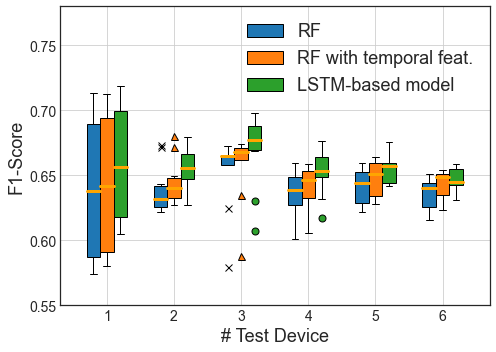

In [5]:
#Delhi (a)
df_rf_old=pd.read_csv("./logs/exp/delhi_rf_old_varryDiv.csv") #fix this to run
df_rf=pd.read_csv("./logs/exp/delhi_rf_varryDiv.csv")
df_rnn=pd.read_csv("./logs/exp/delhi_rnn_varryDiv.csv") #fix this to rnn

groups_rf_old=df_rf_old.groupby('num_test_dev')['f1_score_test']
groups_rf=df_rf.groupby('num_test_dev')['f1_score_test']
groups_rnn=df_rnn.groupby('num_test_dev')['f1_score_test']

fig, ax = plt.subplots(figsize=(7,5))
for i in groups_rf.groups.keys():
    bp0=\
    ax.boxplot([groups_rf_old.get_group(i)],
               positions=[i-0.2],
               widths=[0.2],
               showfliers=True,notch=False,patch_artist=True, 
               boxprops=dict(facecolor=color[0]),
               #whiskerprops = dict(linestyle='-',linewidth=linewidth-1, color='black'),
               #capprops=dict(linestyle='-',linewidth=linewidth-1, color='black'),
               medianprops=dict(linestyle='-',linewidth=linewidth-1, color='orange'),
               flierprops=dict(marker='x',markeredgecolor="k",markerfacecolor=color[0],markersize=7))
    
    bp1=\
    ax.boxplot([groups_rf.get_group(i)],
               positions=[i],
               widths=[0.2],
               showfliers=True,notch=False,patch_artist=True, 
               boxprops=dict(facecolor=color[1]),
               #whiskerprops = dict(linestyle='-',linewidth=linewidth-1, color='black'),
               #capprops=dict(linestyle='-',linewidth=linewidth-1, color='black'),
               medianprops=dict(linestyle='-',linewidth=linewidth-1, color='orange'),
               flierprops=dict(marker='^',markeredgecolor="k",markerfacecolor=color[1],markersize=7))
    bp2=\
    ax.boxplot([groups_rnn.get_group(i)],
               positions=[i+0.2],
               widths=[0.2],
               showfliers=True,notch=False,patch_artist=True, 
               boxprops=dict(facecolor=color[2]),
               #whiskerprops = dict(linestyle='-',linewidth=linewidth-1, color='black'),
               #capprops=dict(linestyle='-',linewidth=linewidth-1, color='black'),
               medianprops=dict(linestyle='-',linewidth=linewidth-1, color='orange'),
               flierprops=dict(marker='o',markeredgecolor="k",markerfacecolor=color[2],markersize=7))
   
    #for box in bp1['boxes']:
    #    box.set(hatch = 'oo')
    #for box in bp2['boxes']:
    #    box.set(hatch = '//')

ax.set_xlabel("# Test Device",fontsize=18)
ax.set_ylabel("F1-Score",fontsize=18)
ax.set_ylim(0.55,0.78)
ax.set_xticks(list(groups_rf.groups.keys()))
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=14)
plt.yticks(fontsize=14)

#LEGEND######
plt.bar([1],[0],label='RF',color=color[0],ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color=color[1],ec='k')#,hatch='oo')
plt.bar([1],[0],label='LSTM-based model',color=color[2],ec='k')#,hatch='//')
plt.legend(loc='upper right',prop=dict(size=18))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_varryDiv.png")

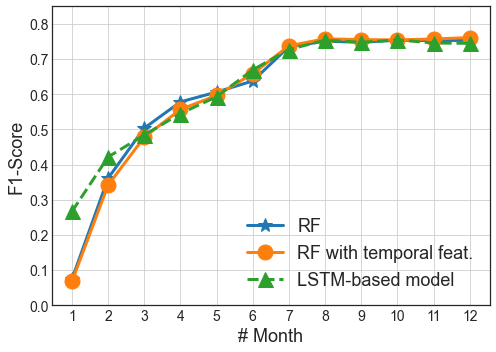

In [6]:
#Durgapur (b)-1
rf_old_1by1=pd.read_csv("./logs/exp/dgp_rf_old_month_1by1.csv")['f1_score_test']
rf_1by1=pd.read_csv("./logs/exp/dgp_rf_month_1by1.csv")['f1_score_test']
rnn_1by1=pd.read_csv("./logs/exp/dgp_rnn_month_1by1.csv")['f1_score_test']

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
#RF OLD
ax.plot(rf_old_1by1.index+1,rf_old_1by1,marker="*",linestyle="-",label="RF",markersize=15,
        linewidth=3,c=color[0])
#RF
ax.plot(rf_1by1.index+1,rf_1by1,marker="o",linestyle="-",label="RF with temporal feat.",markersize=15,
        linewidth=3,c=color[1])
#RNN
ax.plot(rnn_1by1.index+1,rnn_1by1,marker="^",linestyle="--",label="LSTM-based model",markersize=15,
        linewidth=3,c=color[2]) 
plt.ylim(0,0.85)
plt.yticks(fontsize=14)
plt.xticks([i for i in range(1,13)],fontsize=14)
ax.set_xticklabels([i for i in range(1,13)])
ax.set_xlabel("# Month",fontsize=18)
ax.set_ylabel("F1-Score",fontsize=18)
ax.legend(loc='lower right',prop=dict(size=18))
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_1by1.png")

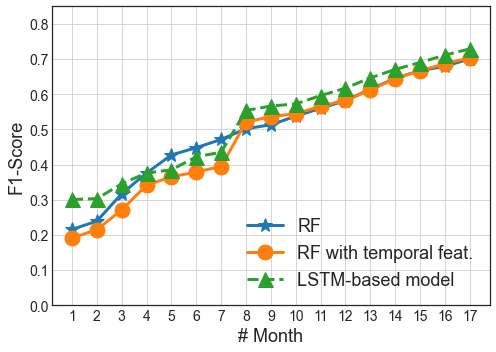

In [7]:
#Delhi (b)-2
rf_old_1by1=pd.read_csv("./logs/exp/delhi_rf_old_month_1by1.csv")['f1_score_test']
rf_1by1=pd.read_csv("./logs/exp/delhi_rf_month_1by1.csv")['f1_score_test']
rnn_1by1=pd.read_csv("./logs/exp/delhi_rnn_month_1by1.csv")['f1_score_test']

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
#RF OLD
ax.plot(rf_old_1by1.index+1,rf_old_1by1,marker="*",linestyle="-",label="RF",markersize=15,
        linewidth=3,c=color[0])
#RF
ax.plot(rf_1by1.index+1,rf_1by1,marker="o",linestyle="-",label="RF with temporal feat.",markersize=15,
        linewidth=3,c=color[1])
#RNN
ax.plot(rnn_1by1.index+1,rnn_1by1,marker="^",linestyle="--",label="LSTM-based model",markersize=15,
        linewidth=3,c=color[2]) 
plt.ylim(0,0.85)
plt.yticks(fontsize=14)
plt.xticks([i for i in range(1,18)],fontsize=14)
ax.set_xticklabels([i for i in range(1,18)])
ax.set_xlabel("# Month",fontsize=18)
ax.set_ylabel("F1-Score",fontsize=18)
ax.legend(loc='lower right',prop=dict(size=18))
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_1by1.png")

In [8]:
#NICE

In [7]:
from library.models.rnn import RNN
from library.constants import epochs,batch_size
from library.models.rf import RandomForest,OldRandomForest
from library.experiments import experiment,datasplit_experiment
from IPython.display import clear_output

def classwise_F1_score_and_conf_met(model):
    y_true = model.y_test
    y_pred = model.pred_fn(model.X_test)
    labels = [0, 1, 2, 3, 4]

    f1_scores = f1_score(y_true, y_pred, average=None, labels=labels)
    f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
    conf_met=confusion_matrix(y_true,y_pred)
    return f1_scores_with_labels,conf_met

In [8]:
#Durgapur

city="Dgp"
restore=True

old_rf_model_fn=lambda path=None,restore=False: OldRandomForest()
rf_model_fn=lambda path=None,restore=False: RandomForest()
rnn_model_fn=lambda path='./logs/model/checkpoint',restore=False: RNN(checkpoint_filepath=path,restore=restore)

def datasplit_experiment(exp_name,city,model_fn,test_size=0.3,epochs=None,batch_size=None,restore=False):
    save_pattern=city+"_"+exp_name
    model=model_fn(path='./logs/model/'+save_pattern,restore=restore)
    fig=model.train_on_files(f"./Data/{city}/*",test_size=test_size,epochs=epochs,batch_size=batch_size)
    return model

rf_old=datasplit_experiment("split_rf_old",city,old_rf_model_fn,test_size=0.3,
                            epochs=epochs,batch_size=batch_size,restore=restore)
rf=datasplit_experiment("split_rf",city,rf_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)
rnn=datasplit_experiment("split_rnn",city,rnn_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)

clear_output()
rnn_f1,rnn_conf=classwise_F1_score_and_conf_met(rnn)
rf_f1,rf_conf=classwise_F1_score_and_conf_met(rf)
rf_old_f1,rf_old_conf=classwise_F1_score_and_conf_met(rf_old)

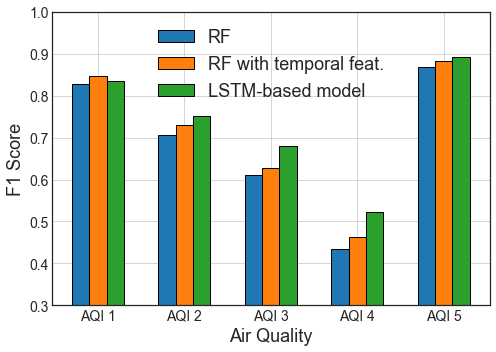

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color[0],
       width=0.2,ec='k',linewidth=1,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="RF")

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color[1],
       width=0.2,ec='k',linewidth=1,#hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="RF with temporal feat.")
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_f1.values(), #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color[2],
       width=0.2,ec='k',linewidth=1,#hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="LSTM-based model")

ax.set_ylim(0.3,1.0)

ax.set_xlabel("Air Quality",fontsize=18)
ax.set_ylabel("F1 Score",fontsize=18)

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=14)
plt.yticks(fontsize=14)

#LEGEND######
# plt.bar([1],[0],label='RF',color='white',ec='k')
# plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
# plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper center',prop=dict(size=18))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_aqi.png")

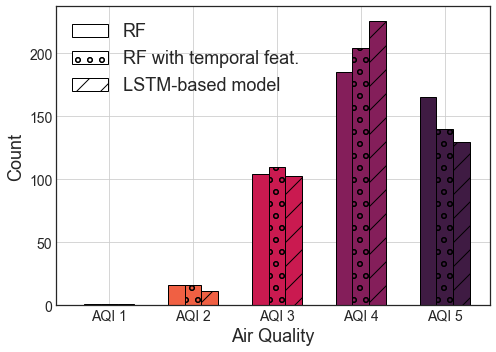

In [10]:
color_red=sns.color_palette('rocket_r',5)

fig, ax = plt.subplots(figsize=(7,5))
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=1,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=1,hatch='o',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_conf[3,:], #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=1,hatch='/',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#ax.set_ylim(0.3,1.0)

ax.set_xlabel("Air Quality",fontsize=18)
ax.set_ylabel("Count",fontsize=18)

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=14)
plt.yticks(fontsize=14)

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='o')
plt.bar([1],[0],label='LSTM-based model',color='white',ec='k',hatch='/')
plt.legend(loc='upper left',prop=dict(size=18))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_aqi4_miss.png")

In [11]:
#Delhi

city="Delhi"
restore=True

old_rf_model_fn=lambda path=None,restore=False: OldRandomForest()
rf_model_fn=lambda path=None,restore=False: RandomForest()
rnn_model_fn=lambda path='./logs/model/checkpoint',restore=False: RNN(checkpoint_filepath=path,restore=restore)

def datasplit_experiment(exp_name,city,model_fn,test_size=0.3,epochs=None,batch_size=None,restore=False):
    save_pattern=city+"_"+exp_name
    model=model_fn(path='./logs/model/'+save_pattern,restore=restore)
    fig=model.train_on_files(f"./Data/{city}/*",test_size=test_size,epochs=epochs,batch_size=batch_size)
    return model

rf_old=datasplit_experiment("split_rf_old",city,old_rf_model_fn,test_size=0.3,
                            epochs=epochs,batch_size=batch_size,restore=restore)
rf=datasplit_experiment("split_rf",city,rf_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)
rnn=datasplit_experiment("split_rnn",city,rnn_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)

clear_output()
rnn_f1,rnn_conf=classwise_F1_score_and_conf_met(rnn)
rf_f1,rf_conf=classwise_F1_score_and_conf_met(rf)
rf_old_f1,rf_old_conf=classwise_F1_score_and_conf_met(rf_old)

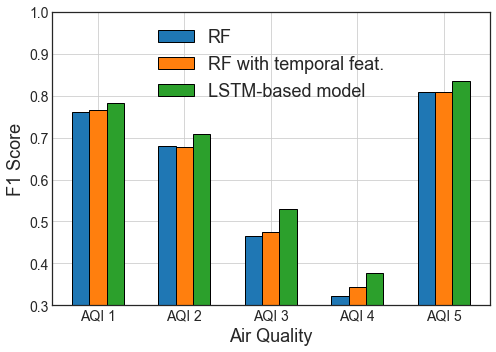

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color[0],
       width=0.2,ec='k',linewidth=1,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="RF")

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color[1],
       width=0.2,ec='k',linewidth=1,#hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="RF with temporal feat.")
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_f1.values(), #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color[2],
       width=0.2,ec='k',linewidth=1,#hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1),label="LSTM-based model")

ax.set_ylim(0.3,1.0)

ax.set_xlabel("Air Quality",fontsize=18)
ax.set_ylabel("F1 Score",fontsize=18)

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=14)
plt.yticks(fontsize=14)

#LEGEND######
# plt.bar([1],[0],label='RF',color='white',ec='k')
# plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
# plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper center',prop=dict(size=18))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_aqi.png")

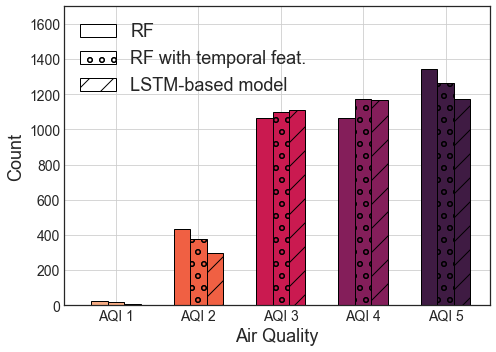

In [13]:
color_red=sns.color_palette('rocket_r',5)

fig, ax = plt.subplots(figsize=(7,5))
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=1,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=1,hatch='o',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_conf[3,:], #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=1,hatch='/',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

ax.set_ylim(0,1700)

ax.set_xlabel("Air Quality",fontsize=18)
ax.set_ylabel("Count",fontsize=18)

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=14)
plt.yticks(fontsize=14)

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='o')
plt.bar([1],[0],label='LSTM-based model',color='white',ec='k',hatch='/')
plt.legend(loc='upper left',prop=dict(size=18))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_aqi4_miss.png")

In [14]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#color=["#332288","#117733","#44AA99","#88CCEE","#DDCC77","#CC6677"]
color=sns.color_palette('rocket_r',5)

def read_with_nclass(f,class5=True):
    df=pd.read_csv(f)
    if class5==True:
        df['AQI']=df.AQI.apply(lambda e: 5 if e==6 else e)
    return df

def read_all_files(loc,class5=True):
    files=glob.glob(f"./Data/{loc}/*")
    devices=[f.split("\\")[-1].split("_merged")[0] for f in files]
    df=pd.concat([read_with_nclass(f,class5) for f in files])
    return df

def time_zone_cal(s):
    hour=int(s.split()[1].split(':')[0])
    if 0<=hour<=5:#0:00-5:59
        time_zone='Early_Morning'
    elif 6<=hour<=11: #6:00-11:59
        time_zone='Morning'
    elif 12<=hour<=17: #12:00-17:59
        time_zone='Afternoon'
    else: #18:00-23:59
        time_zone='Evening'
    return time_zone

def plot_time_wise_data_dist(city="Dgp"):
    df=read_all_files(city)
    df['timezone']=df.timestamp.apply(time_zone_cal)

    fig=plt.figure(figsize=(7,5))
    ax=fig.add_subplot(111)
    tz=['Early_Morning','Morning','Afternoon','Evening']
    df2=df.groupby('timezone').AQI.value_counts().unstack('AQI')
    df2.columns=[f'AQI {i}' for i in range(1,6)]
    df2.plot.bar(stacked=True,ax=ax,color=color,ec='k',linewidth=1,width=0.4)
    ax.set_xticklabels(['Early Morning','Morning','Afternoon','Evening'],rotation=0,fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlabel("Time Period",fontsize=18)
    ax.set_ylabel("# Samples",fontsize=18)
    if city=="Dgp":ax.set_ylim(0,5500)
    else:ax.set_ylim(0,55000)
    ax.legend(loc="upper right",fontsize=18,ncol=3)
    ax.grid()
    plt.tight_layout()
    plt.show()
    fig.savefig(f"./logs/figs/{city}_time_wise_dist.png")

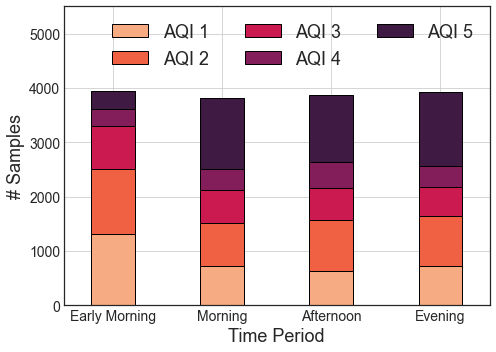

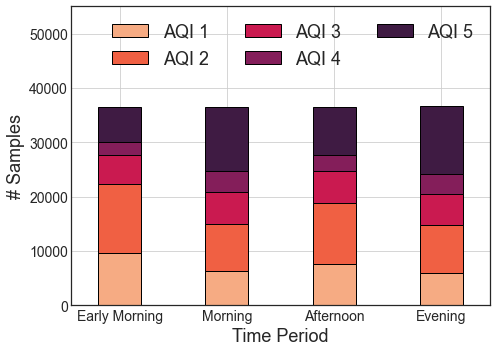

In [15]:
fig_dgp=plot_time_wise_data_dist("Dgp")
fig_delhi=plot_time_wise_data_dist("Delhi")

In [16]:
# Time Vs AQI Correlation

In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from library.constants import *
from library.utils import timecluster,season
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

In [2]:
df=pd.concat([pd.read_csv(f) for f in glob.glob("./Data/raw/Dgp/*")],axis=0)

df['hour']=df.timestamp.apply(lambda e:e.split()[1])
df['time_cluster']=df.timestamp.apply(lambda e:timecluster(int(e.split()[1])))
df['season']=df.timestamp.apply(lambda e:season(int(e.split()[0].split('-')[1])))

In [3]:
season_groups=df.groupby('season')

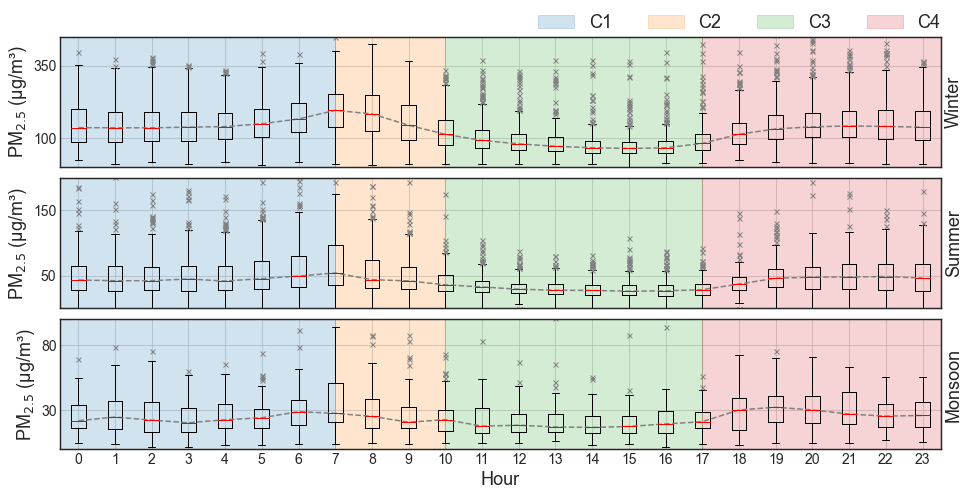

In [4]:
fig=plt.figure(figsize=(14,7))
season_dict={0:'Winter',1:'Summer',2:'Monsoon'}
for s_gr in season_groups.groups:
    #print(s_gr)
    df_seas=season_groups.get_group(s_gr)
    hour_groups=df_seas.groupby('hour')
    
    ax=fig.add_subplot(3,1,int(s_gr)+1)
    lis=[];pos=[]
    for gr in hour_groups.groups.keys():
        ax.boxplot([hour_groups.get_group(gr)['Dust (PM2.5)']],positions=[int(gr)],widths=0.4,
                  flierprops=dict(marker='x',markeredgecolor="grey",markersize=5),
                  medianprops=dict(color='red'))
        lis.append(hour_groups.get_group(gr)['Dust (PM2.5)'].median())
        pos.append(int(gr))
    ax.plot(pos,lis,c='grey',linestyle='--')
        
    X=[[-0.5,7],[7,10],[10,17],[17,23.5]]
    Y=[[500,500],[500,500],[500,500],[500,500]]
    color=[[0.12156863, 0.46666667, 0.70588235],
           [1.        , 0.49803922, 0.05490196],
           [0.17254902, 0.62745098, 0.17254902],
           [0.83921569, 0.15294118, 0.15686275]]
    labels=['C1','C2','C3','C4']
    for x,y,c,l in zip(X,Y,color,labels):
        plt.fill_between(x, y,color=c,alpha=0.2,label=l)
    
    if s_gr==0:
        plt.ylim(0,450)
        ax.set_xticklabels([])
        plt.yticks([100,350],fontsize=14)
    elif s_gr==1:
        plt.ylim(0,200)
        ax.set_xticklabels([])
        plt.yticks([50,150],fontsize=14)
    elif s_gr==2:
        plt.ylim(0,100)
        plt.xticks(fontsize=14)
        plt.yticks([30,80],fontsize=14)
        
    plt.xlim(-0.5,23.5)
    plt.grid()
    ax.set_ylabel('PM$_{2.5}$ (\u03bcg/m\u00b3)',fontdict=dict(fontsize=18))
    ax1 = ax.twinx()
    ax1.set_yticks([])
    ax1.set_ylabel(season_dict[s_gr],fontdict=dict(fontsize=18))

ax.set_xlabel('Hour',fontdict=dict(fontsize=18))
fig.axes[0].legend(loc=(0.535,0.98),ncol=4,fontsize=18)
plt.tight_layout()
fig.savefig("./logs/figs/temporal_proof.png")

# Data Distribution plots

In [21]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

In [22]:
#plt.style.available

In [23]:
def read_with_nclass(f,class5=True):
    df=pd.read_csv(f)
    if class5==True:
        df['AQI']=df.AQI.apply(lambda e: 5 if e==6 else e)
    return df

def read_all_files(loc,class5=True):
    files=glob.glob(f"./Data/{loc}/*")
    devices=[f.split("\\")[-1].split("_merged")[0] for f in files]
    df=pd.concat([read_with_nclass(f,class5) for f in files])
    return df[df.Temperature<=50].copy()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

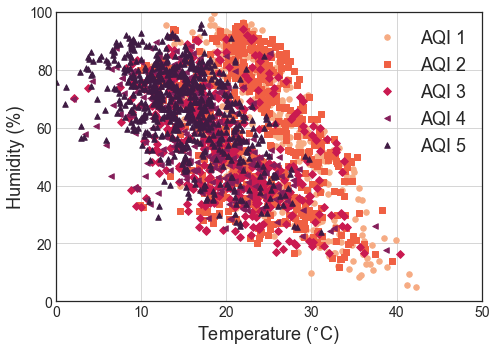

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

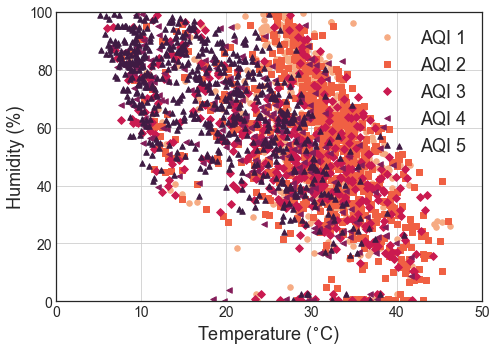

In [24]:
def plot_scatter(loc):
    np.random.seed(101)
    df=read_all_files(loc).dropna().sample(2500)

    g=df.groupby("AQI")[['Temperature','Humidity']]

    markers=["o", "s", "D","<","^"]
    colors=sns.color_palette('rocket_r',5)#['green','yellow','orange','red','brown']

    fig=plt.figure(figsize=(7,5))
    ax=fig.add_subplot(111)
    for i in range(1,6):
        d=g.get_group(i)
        ax.scatter(d.Temperature,d.Humidity,marker=markers[i-1],c=colors[i-1],
                   label=f"AQI {i}",s=30)

    plt.xlim(0,50)
    plt.ylim(0,100)
    ax.grid()
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    ax.set_xlabel("Temperature ($\mathbf{^{\circ}}$C)",fontsize=18)
    ax.set_ylabel("Humidity (%)",fontsize=18)
    ax.legend(loc='upper right',prop=dict(size=18),ncol=1)
    plt.tight_layout()
    plt.show()
    fig.savefig(f"./logs/figs/th_scatter_{loc}.png")
    
plot_scatter("Dgp")
plot_scatter("Delhi")

In [25]:
def read_with_nclass(f,class5=True):
    df=pd.read_csv(f)
    if class5==True:
        df['AQI']=df.AQI.apply(lambda e: 5 if e==6 else e)
    return df

def read_with_nclass_div_wise(f,class5=True):
    df=pd.read_csv(f)
    if class5==True:
        df['AQI']=df.AQI.apply(lambda e: 5 if e==6 else e)
    dic=df.AQI.value_counts().to_dict()
    return dic

def read_files(loc,class5=True,div_wise=True):
    files=glob.glob(f"./DATA/{loc}/*")
    devices=[f.split("\\")[-1].split("_merged")[0] for f in files]
    if div_wise==False:
        dic=pd.concat([read_with_nclass(f,class5) for f in files]).AQI.value_counts()
    else:
        dic=pd.DataFrame(dict([(d,read_with_nclass_div_wise(f,class5)) for d,f in zip(devices,files)]))
    return dic

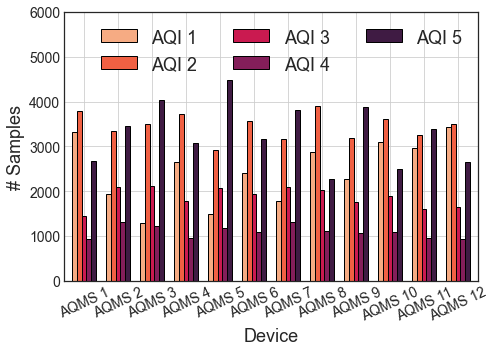

In [26]:
#Delhi
df=read_files("Delhi",class5=True,div_wise=True)

df.columns=['Device 1', 'Device 2', 'Device 3', 'Device 4', 'Device 5',
       'Device 6', 'Device 7', 'Device 8', 'Device 9', 'Device 10',
       'Device 11', 'Device 12']

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
tz=[f'AQI_{i}' for i in range(1,6)]
df.loc[[1,2,3,4,5]].T.plot.bar(ax=ax,color=sns.color_palette('rocket_r',5),#['green','yellow','orange','red','brown'],
                               width=0.7,ec='k',linewidth=1)
#ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],rotation=0,fontsize=22,fontweight="bold")
ax.set_xticklabels([f'AQMS {i}' for i in range(1,13)],rotation=25,fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("# Samples",fontsize=18)
ax.set_ylim(0,6000)
ax.legend([f'AQI {i}' for i in range(1,6)],loc='upper right',prop=dict(size=18),ncol=3)
ax.grid()
plt.tight_layout()
plt.show()
fig.savefig(f"./logs/figs/data_dist_DELHI.png")

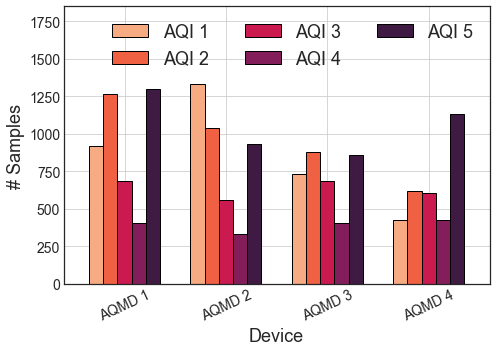

In [27]:
#Dgp
df=read_files("Dgp",class5=True,div_wise=True)

df.columns=['Device 1', 'Device 2', 'Device 3', 'Device 4']

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
tz=[f'AQI_{i}' for i in range(1,6)]
df.loc[[1,2,3,4,5]].T.plot.bar(ax=ax,color=sns.color_palette('rocket_r',5),#=['green','yellow','orange','red','brown'],
                               width=0.7,ec='k',linewidth=1)
ax.set_xticklabels([f'AQMD {i}' for i in range(1,5)],rotation=25,fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("# Samples",fontsize=18)
ax.set_ylim(0,1850)
ax.legend([f'AQI {i}' for i in range(1,6)],loc='best',prop=dict(size=18),ncol=3)
ax.grid()
plt.tight_layout()
plt.show()
fig.savefig(f"./logs/figs/data_dist_DGP.png")

In [28]:
#Temperature & Humidity difference

In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
    
def read_data(file):
    df=pd.read_csv(file).dropna()
    df["AQI"]=df.AQI.apply(lambda e: 5 if e==6 else e)
    return df[["timestamp","Temperature","feels_like","Humidity","AQI"]].copy()

def filter_summer(df):
    return df[df['timestamp'].apply(lambda e: 4<=int(e.split("-")[1])<=7)]

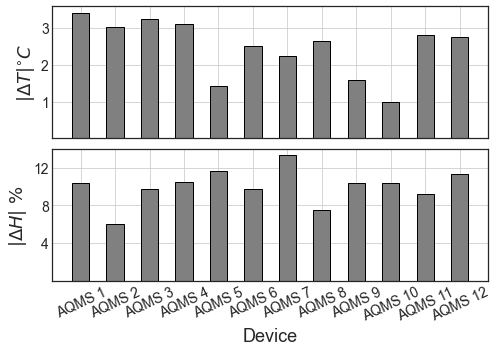

In [2]:
loc="Delhi"
Div_files=glob.glob(f"./Data/{loc}/*.csv")
div=dict(zip(Div_files,[read_data(div_file) for div_file in Div_files]))

base_t=pd.concat(div.values()).feels_like.median()
temp_h=[abs(div[div_file].Temperature.median()-base_t) for div_file in Div_files]

base_h=pd.read_csv("./Data/raw/Met/Delhi_met_citywide.csv").humidity.median()
hum_h=[abs(div[div_file].Humidity.median()-base_h) for div_file in Div_files]

fig = plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.bar(x=range(12),height=temp_h,align='center',width=0.5,color='grey',ec='k',linewidth=1)
ax.set_ylabel("$|\Delta T|^{\circ}C$",fontsize=18)

ax.set_xticks(range(12))
ax.set_xticklabels([])
plt.yticks([1,2,3],fontsize=14)
plt.tight_layout()
plt.grid()

ax=fig.add_subplot(2,1,2)
ax.bar(x=range(12),height=hum_h,align='center',width=0.5,color='grey',ec='k',linewidth=1)

ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("$|\Delta H|~\%$",fontsize=18)

ax.set_xticks(range(12))
ax.set_xticklabels([f"AQMS {n+1}" for n in range(12)],rotation=25,fontsize=14)
plt.yticks([4,8,12],fontsize=14)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_dT_dH.png")

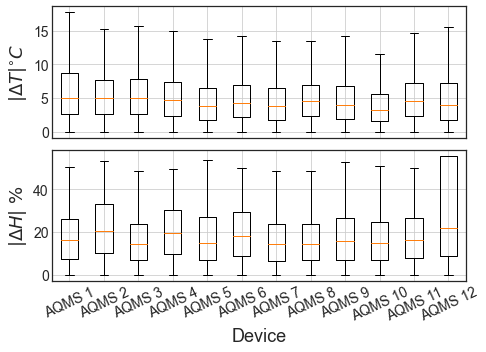

In [2]:
loc="Delhi"
Div_files=glob.glob(f"./Data/{loc}/*.csv")
div=dict(zip(Div_files,[read_data(div_file) for div_file in Div_files]))

base_t=filter_summer(pd.concat(div.values())).feels_like.median()
temp_h=[abs(filter_summer(div[div_file]).Temperature-base_t).values for div_file in Div_files]

base_h=filter_summer(pd.read_csv("./Data/raw/Met/Delhi_met_citywide.csv")).humidity.median()
hum_h=[abs(filter_summer(div[div_file]).Humidity-base_h).values for div_file in Div_files]

fig = plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.boxplot(x=temp_h,positions=range(12),showfliers=False)
ax.set_ylabel("$|\Delta T|^{\circ}C$",fontsize=18)

ax.set_xticks(range(12))
ax.set_xticklabels([])
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid()

ax=fig.add_subplot(2,1,2)
ax.boxplot(x=hum_h,positions=range(12),showfliers=False)

ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("$|\Delta H|~\%$",fontsize=18)

ax.set_xticks(range(12))
ax.set_xticklabels([f"AQMS {n+1}" for n in range(12)],rotation=25,fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_dT_dH.png")

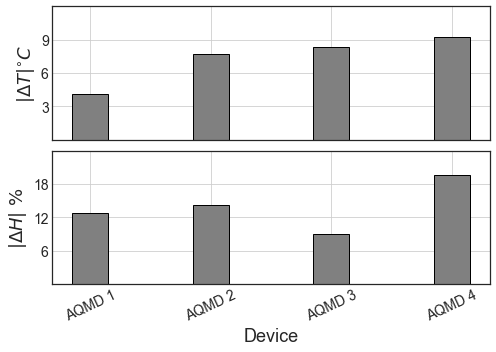

In [9]:
loc="Dgp"
Div_files=glob.glob(f"./Data/{loc}/*.csv")
div=dict(zip(Div_files,[read_data(div_file) for div_file in Div_files]))

base_t=pd.concat(div.values()).feels_like.median()
temp_h=[abs(div[div_file].Temperature.median()-base_t) for div_file in Div_files]

base_h=pd.read_csv("./Data/raw/Met/metrology_processed_citywide.csv").humidity.median()
hum_h=[abs(div[div_file].Humidity.median()-base_h) for div_file in Div_files]

fig = plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.bar(x=range(4),height=temp_h,align='center',width=0.3,color='grey',ec='k',linewidth=1)
ax.set_ylabel("$|\Delta T|^{\circ}C$",fontsize=18)

ax.set_xticks(range(4))
ax.set_xticklabels([])
plt.yticks([3,6,9],fontsize=14)
plt.ylim(0,12)
plt.tight_layout()
plt.grid()

ax=fig.add_subplot(2,1,2)
ax.bar(x=range(4),height=hum_h,align='center',width=0.3,color='grey',ec='k',linewidth=1)

ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("$|\Delta H|~\%$",fontsize=18)

ax.set_xticks(range(4))
ax.set_xticklabels([f"AQMD {n+1}" for n in range(4)],rotation=25,fontsize=14)
plt.yticks([6,12,18],fontsize=14)
plt.ylim(0,24)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_dT_dH.png")

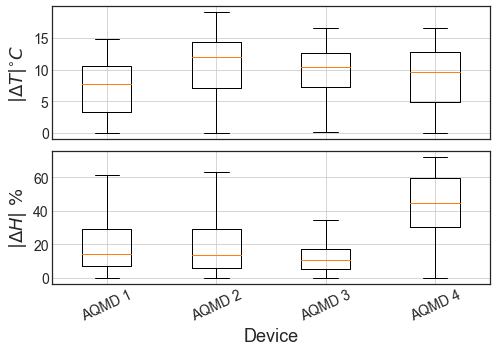

In [3]:
loc="Dgp"
Div_files=glob.glob(f"./Data/{loc}/*.csv")
div=dict(zip(Div_files,[read_data(div_file) for div_file in Div_files]))

base_t=filter_summer(pd.concat(div.values())).feels_like.median()
temp_h=[abs(filter_summer(div[div_file]).Temperature-base_t) for div_file in Div_files]

base_h=pd.read_csv("./Data/raw/Met/metrology_processed_citywide.csv").humidity.median()
hum_h=[abs(filter_summer(div[div_file]).Humidity-base_h) for div_file in Div_files]

fig = plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.boxplot(x=temp_h,positions=range(4),showfliers=False)
ax.set_ylabel("$|\Delta T|^{\circ}C$",fontsize=18)

ax.set_xticks(range(4))
ax.set_xticklabels([])
plt.yticks(fontsize=14)
#plt.ylim(0,12)
plt.tight_layout()
plt.grid()

ax=fig.add_subplot(2,1,2)
ax.boxplot(x=hum_h,positions=range(4),showfliers=False)

ax.set_xlabel("Device",fontsize=18)
ax.set_ylabel("$|\Delta H|~\%$",fontsize=18)

ax.set_xticks(range(4))
ax.set_xticklabels([f"AQMD {n+1}" for n in range(4)],rotation=25,fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0,24)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_dT_dH.png")

# Event

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
aqms=pd.read_csv("./Data/raw/Event/AQMS.csv")
aqms['PM2.5']=aqms['PM2.5'].apply(lambda e:float(e) if e!='None' else np.nan)
aqms=aqms.dropna()
aqms['To Date']=aqms['To Date'].apply(pd.to_datetime)

aqmd=pd.read_csv("./Data/raw/Event/AQMD (LP).csv")
aqmd['PM2.5']=aqmd['PM2.5'].apply(lambda e:float(e) if e!='None' else np.nan)
aqmd=aqmd.dropna()
aqmd['To Date']=aqmd['Date'].apply(pd.to_datetime)

time_stamp=list(set(aqms['To Date'])&set(aqmd['To Date']))
aqms=aqms[aqms['To Date'].apply(lambda e:True if e in time_stamp else False)].sort_values(by="To Date").iloc[:-2]
aqmd=aqmd[aqmd['To Date'].apply(lambda e:True if e in time_stamp else False)].sort_values(by="To Date").iloc[:-2]

thetas=aqmd['PM2.5'].values

V=0
beta=0.94
values=[]

for t,theta in enumerate(thetas):
    V=beta*V+(1-beta)*theta
    values.append(V)
aqmd['AVG PM2.5']=values

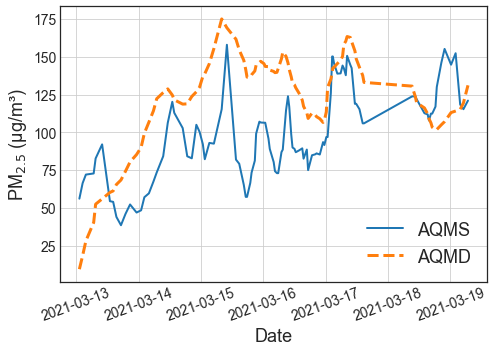

In [3]:
fig=plt.figure(figsize=(7,5))
ax1=fig.add_subplot(111)

ax1.plot(aqms['To Date'], aqms['PM2.5'], label="AQMS",linestyle='-',linewidth=2)
ax1.plot(aqmd['To Date'], aqmd['AVG PM2.5'], label="AQMD",linestyle='--',linewidth=3)

plt.xticks(rotation=20)
plt.xlabel('Date',fontsize=18)
plt.ylabel('PM$_{2.5}$ (\u03bcg/m\u00b3)',fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.legend(prop={'size':18},loc='lower right')
#plt.ylim(0,400)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/Nearby.png")

In [6]:
#Fire Event
aqmdlp=pd.read_csv("./Data/raw/Event/fire/aqmdlp.csv",header=None)

aqmdlp.columns=['date', 'ts',' sl','pm1','PM2.5','1','2','3','4','5','6']
aqmdlp['Date']=aqmdlp.date+aqmdlp.ts
aqmdlp['Date']=aqmdlp['Date'].apply(pd.to_datetime)

aqmd1=pd.read_csv("./Data/raw/Event/fire/aqmd1.csv")
aqmd1['Date']=aqmd1['Date'].apply(pd.to_datetime)

aqmd2=pd.read_csv("./Data/raw/Event/fire/aqmd2.csv")
aqmd2['Date']=aqmd2['Date'].apply(pd.to_datetime)
time_stamp=list(set(aqmdlp['Date'])&set(aqmd1['Date'])&set(aqmd2['Date']))

aqmdlp=aqmdlp[aqmdlp['Date'].apply(lambda e:True if e in time_stamp else False)].sort_values(by="Date")
aqmd1=aqmd1[aqmd1['Date'].apply(lambda e:True if e in time_stamp else False)].sort_values(by="Date")
aqmd2=aqmd2[aqmd2['Date'].apply(lambda e:True if e in time_stamp else False)].sort_values(by="Date")

def get_trail(n,initv=35,lastv=1000):
    x=lastv
    noise=[x]
    damping=0.25
    std_dev=15

    for i in range(n):
        x_next = (1 - damping) * x + np.random.normal(initv, std_dev)
        noise.append(x_next)
        x=x_next
    return noise[::-1][::5]

ts=[pd.to_datetime(t) for t in ['2020-12-15 10:00:00','2020-12-15 10:30:00','2020-12-15 11:00:00','2020-12-15 11:30:00',
                                 '2020-12-15 12:00:00','2020-12-15 12:30:00','2020-12-15 13:00:00','2020-12-15 13:30:00',
                                 '2020-12-15 14:00:00','2020-12-15 14:30:00','2020-12-15 15:00:00']]

aqmdlp_trail=get_trail(50)
aqmd1_trail=get_trail(50)
aqmd2_trail=get_trail(50)

/var/folders/3f/t94jfkd11034jdmxfm496y380000gn/T/ipykernel_1452/3014241144.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([i for i in range(10,19)])


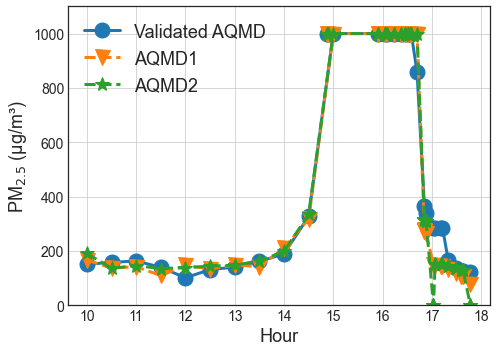

In [7]:
fig=plt.figure(figsize=(7,5))
ax1=fig.add_subplot(111)

ax1.plot(ts+aqmdlp['Date'].tolist(), aqmdlp_trail+aqmdlp['PM2.5'].tolist(), label="Validated AQMD",linestyle='-',marker='o',markersize=15,linewidth=3)
ax1.plot(ts+aqmd1['Date'].tolist(),aqmd1_trail+aqmd1['Dust (PM2.5)'].tolist(), label="AQMD1",linestyle='--',marker='v',markersize=15,linewidth=3)
ax1.plot(ts+aqmd2['Date'].tolist(),aqmd2_trail+aqmd2['Dust (PM2.5)'].tolist(), label="AQMD2",linestyle='--',marker='*',markersize=15,linewidth=3)


# plt.xticks(rotation=20)
plt.xlabel('Hour',fontsize=18)
plt.ylabel('PM$_{2.5}$ (\u03bcg/m\u00b3)',fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax1.set_xticklabels([i for i in range(10,19)])
plt.legend(prop={'size':18},loc='best')
plt.ylim(0,1100)
ax1.grid()
plt.tight_layout()
fig.savefig("./logs/figs/Fire_and_event.png")

In [1]:
#power usage

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
exps=["./monitor/exp_rf_10_12_2022_21_54_18.txt",
      "./monitor/exp_rf_t_10_12_2022_22_06_54.txt",
      "./monitor/exp_rnn_10_12_2022_22_19_46.txt"]
exps_power=["./monitor/power_rf.csv",
      "./monitor/power_rf_t.csv",
      "./monitor/power_rnn.csv"]

In [3]:
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area

def usage_in_WattHour(ser):
    normal_time=ser['Time (ms)']-ser['Time (ms)'].min()
    total_mW_usage=integrate(normal_time,ser['USB Avg Power (mW)'])
    mW_per_mS=(total_mW_usage/normal_time.values[-1])
    wattH=(10**-6)*3600*mW_per_mS
    return wattH

def process_power(f,time_window=30000): #in ms
    df=pd.read_csv(f)
    df['tag']=((df['Time (ms)']%time_window==0)*1).cumsum()
    return np.array([usage_in_WattHour(ser) for gr, ser in df.groupby('tag')])

In [4]:
temp=[pd.read_csv(f).TEMP.apply(lambda e:float(e[1:-1])).values for f in exps]
mem=[pd.read_csv(f).MEM.values for f in exps]
cpu=[np.clip(pd.read_csv(f).CPU.values,0,100) for f in exps]
power=[process_power(f) for f in exps_power]

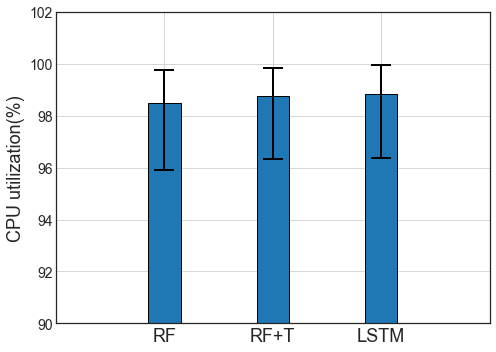

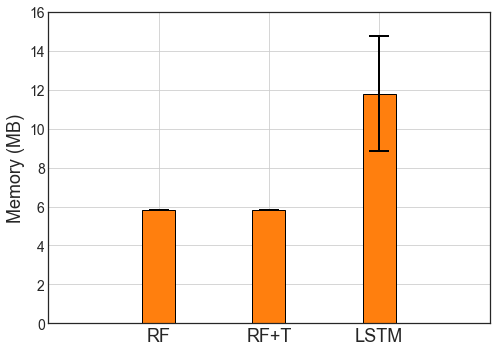

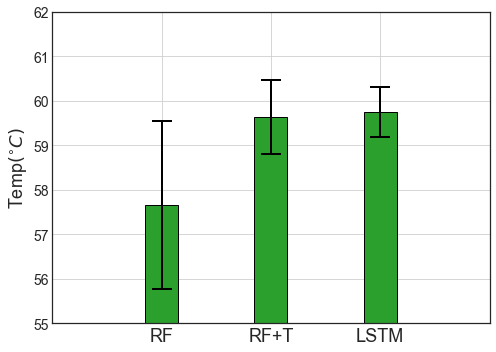

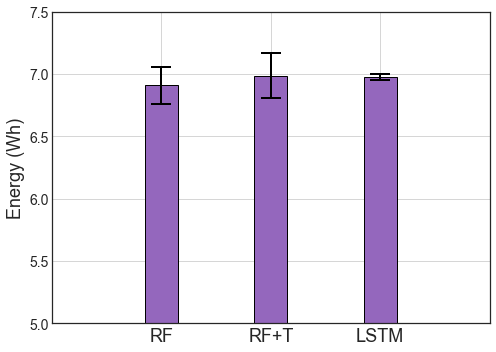

In [5]:
color=sns.color_palette()
linewidth=3

def plot_usage(val=cpu,ylab='CPU utilization(%)',ymin=0,ymax=100,color='b',isCpu=False):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.bar(x=np.array([1,2,3]),height=[l.mean() for l in val],align='center', alpha=1, ecolor='k',
           capsize=10,color=color,
           width=0.3,ec='k',linewidth=1,
           yerr=[[l.std() for l in val],[l.std()-1.35 for l in val]] if isCpu else [l.std() for l in val],
           error_kw =dict(linestyle='-',linewidth=linewidth-1, 
                          color='black',markeredgewidth=linewidth-1))

    ax.set_ylabel(ylab,fontsize=18)
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(["RF", "RF+T", "LSTM"],fontsize=18)
    plt.yticks(fontsize=14)
    plt.xlim(0,4)
    plt.ylim(ymin,ymax)
    plt.tight_layout()
    plt.grid()
    return fig


plot_usage(val=cpu,ylab='CPU utilization(%)',ymin=90,ymax=102,color=color[0],isCpu=True).savefig("./logs/figs/cpu.png")
plot_usage(val=mem,ylab='Memory (MB)',ymin=0,ymax=16,color=color[1]).savefig("./logs/figs/mem.png")
plot_usage(val=temp,ylab='Temp$(^{\circ}C)$',ymin=55,ymax=62,color=color[2]).savefig("./logs/figs/temp.png")
plot_usage(val=power,ylab="Energy (Wh)",ymin=5,ymax=7.5,color=color[4]).savefig("./logs/figs/power.png")